In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.5.1'

---
<a name="addplot_legends"></a>
# Adding plots with *legends* to the basic mplfinance plot()

### To add legends to the additional plots, use the keyword `label` in the `make_addplot()` api, .

#### For example,

```python
import mplfinance as mpf
ap = mpf.make_addplot(df['LowerB'],label="LowerB") 
mpf.plot(df,addplot=ap)
```

### Note: This tutorial assumes you have *already* reviewed the tutorial in `examples/addplot.ipynb`.

---

## `addplot` with legend examples:

Let's start with an example data set that includes Bollinger Band data, in addition to the basic OHLCV data:

In [3]:
df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Using this dataframe, we can of course plot a basic ohlc or candlestick plot:



'0.12.10b0'

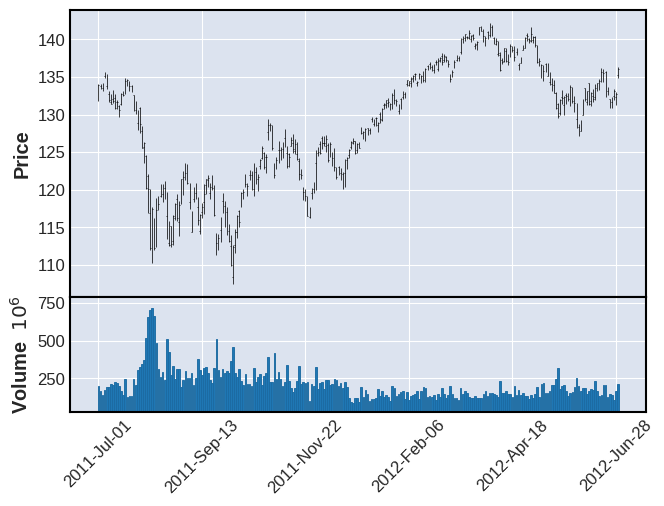

In [4]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True)

---

Let's say we want to plot the Lower Bollinger band along with the basic OHLCV plot.  

We use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

use `label` keyword to label each plot

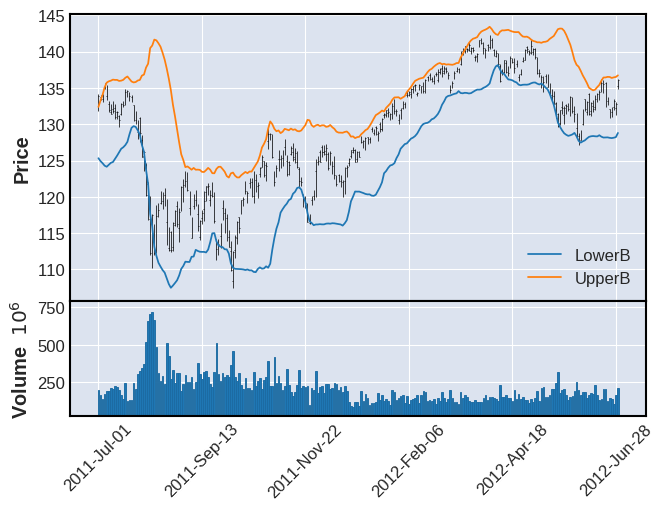

In [5]:
apdict = [mpf.make_addplot(df['LowerB'],label="LowerB"),
          mpf.make_addplot(df['UpperB'],label="UpperB")]
mpf.plot(df,volume=True,addplot=apdict)

## added plots without labels will not show up in the legend

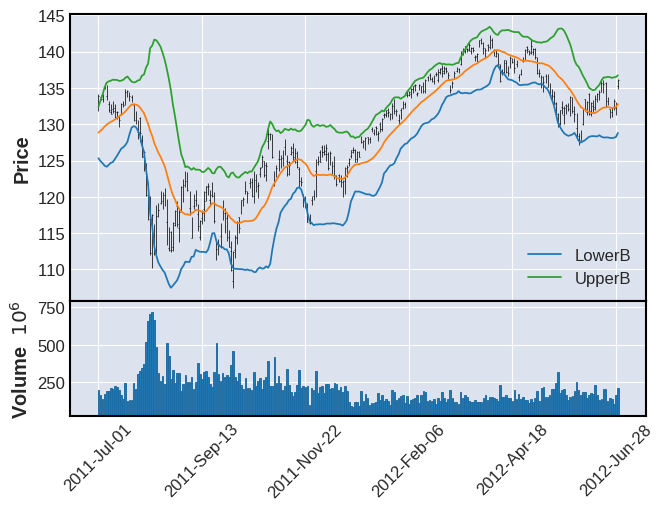

In [6]:
apdict = [mpf.make_addplot(df['LowerB'],label="LowerB"),
          mpf.make_addplot(df['LowerB']/2+df['UpperB']/2), # missing label is ok!
          mpf.make_addplot(df['UpperB'],label="UpperB")]
mpf.plot(df,volume=True,addplot=apdict)

## `label` works with scatter too

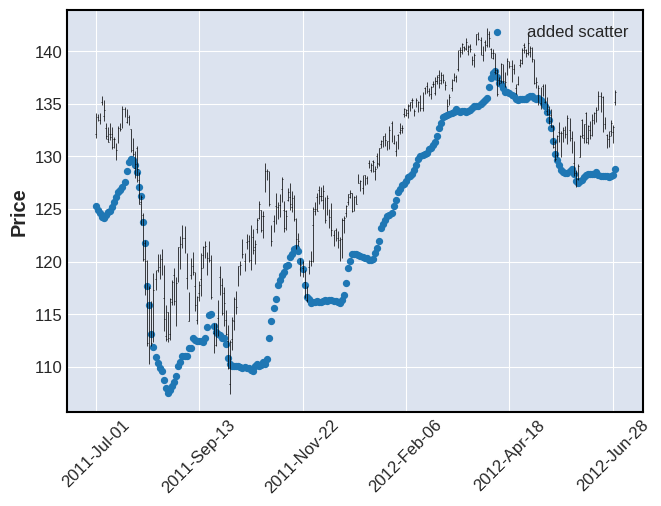

In [7]:
apd = mpf.make_addplot(df['LowerB'],type='scatter',label="added scatter")

mpf.plot(df,addplot=apd)

# more examples with labels:

Note:

- use panel=1 to choose the lower panel
- supported types: 'scatter', 'bar', 'line', 'step'
- *NOT* supported types: 'ohlc', 'candles'

In [8]:
# preparing data:
def percentB_belowzero(percentB,price):
    import numpy as np
    signal   = []
    previous = -1.0
    for date,value in percentB.items():
        if value < 0 and previous >= 0:
            signal.append(price[date]*0.99)
        else:
            signal.append(np.nan)
        previous = value
    return signal
def percentB_aboveone(percentB,price):
    import numpy as np
    signal   = []
    previous = 2
    for date,value in percentB.items():
        if value > 1 and previous <= 1:
            signal.append(price[date]*1.01)
        else:
            signal.append(np.nan)
        previous = value
    return signal
low_signal  = percentB_belowzero(df['PercentB'], df['Close']) 
high_signal = percentB_aboveone(df['PercentB'], df['Close'])

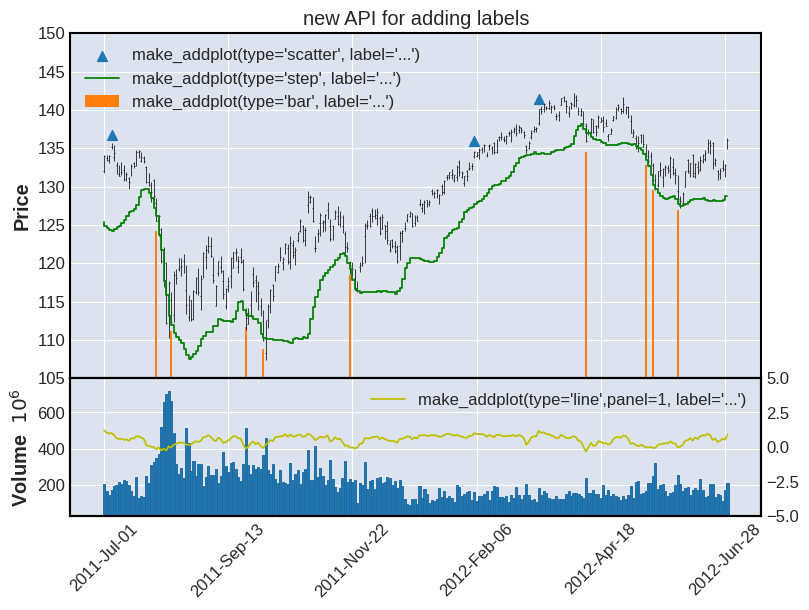

In [9]:
# actual plotting:
apds = [ mpf.make_addplot(high_signal,type='scatter',markersize=50,marker='^',
                          label="make_addplot(type='scatter', label='...')"), 
         mpf.make_addplot(low_signal,type='bar',label="make_addplot(type='bar', label='...')"),
         mpf.make_addplot(df['LowerB'],type='step',color="g",label="make_addplot(type='step', label='...')"),
         mpf.make_addplot((df['PercentB']),panel=1,color='y',label="make_addplot(type='line',panel=1, label='...')")
       ]
fig,ax = mpf.plot(df,addplot=apds,figscale=1.2,volume=True,returnfig=True)
ax[0].set_ylim(105,150);
ax[3].set_ylim(-5,5);
ax[0].set_title("new API for adding labels");

---

## Having multiple plots within one `make_addplot()` can also work.
## In this case, set `label=` a sequence of labels:


- **Note:** When passing *multiple* data sets into a ***single*** `make_addplot()`, then you must pass either no labels, or the correct number of labels.  
  - If you pass labels, but not enough, then a warning will be issued.
- The only way to label some data sets and not others is to use *separate `make_addplot()`* calls, where some make_addplots include labels and some make_addplots do not (as demonstrated above where it says "# missing label is ok!")

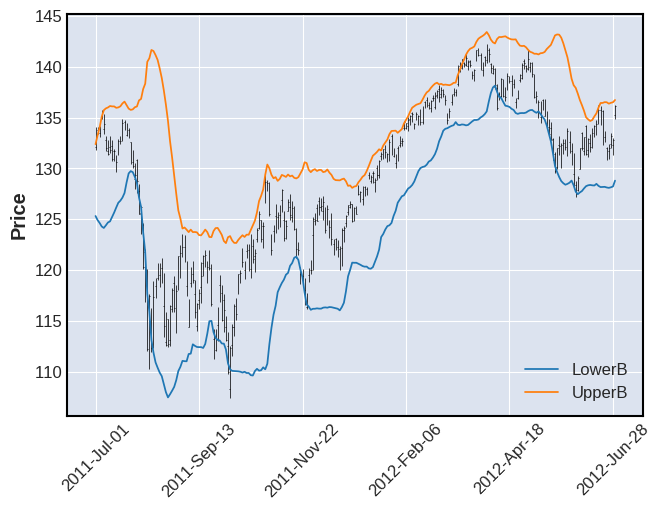

In [10]:
tcdf = df[['LowerB','UpperB']]  # DataFrame with two columns

apd  = mpf.make_addplot(tcdf,label=['LowerB','UpperB'])
mpf.plot(df,addplot=apd)